In [42]:
import numpy as np 
import seaborn as sns 
import matplotlib.pylab as plt

class TuningCurveEstimator():
    def __init__(self, nbin, bin_size=1):
        self.tuning_curve = None
        self.bin_size = bin_size
        self.bin_n = np.zeros((nbin,))
        self.nbin = nbin
        
    def update(self, x, y):
        """_summary_

        Args:
            x (np.array): behavioral variable
            y (np.array): (time x channel)
        """
        x = x//self.bin_size
        
        assert np.max(x) < self.nbin, 'The large data exceed the number of bin'
        assert len(x) == len(y), 'Length of two inputs must be the same'
        
        if self.tuning_curve is None:
            self.tuning_curve = np.zeros((y.shape[1], self.nbin))
            for i in range(self.nbin):
                ysub = y[i==x,:]
                if len(ysub)>0:
                    self.tuning_curve[:,i] = np.mean(ysub,axis=0)
                    self.bin_n[i] = np.sum(i==x)
        else:
            # update the current mean
            for i in range(self.nbin):
                m = np.sum(i==x)
                if m>0:
                    self.tuning_curve[:,i] = (self.bin_n[i]*self.tuning_curve[:,i] + m*np.mean(y[i==x,:],axis=0))/(m + self.bin_n[i])
                    self.bin_n[i] += m
    
    def get_tuning_curve(self):
        return self.tuning_curve
                

In [54]:
x = np.random.randint(0,20,200)
y = np.zeros((len(x),3),dtype=float)
for i in range(len(x)):
    y[i,:] = np.random.normal(x[i]%10, size=3)

In [55]:
estimator = TuningCurveEstimator(nbin=20,bin_size=1)
estimator.update(x[:20], y[:20,:])
estimator.update(x[20:], y[20:,:])

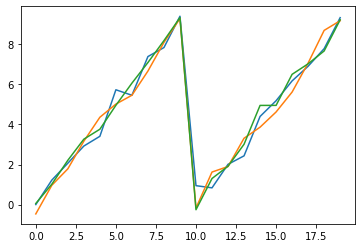

In [56]:
plt.plot(estimator.get_tuning_curve().T)